In [4]:
import pandas as pd
import numpy as np

#load the data
df= pd.read_csv("HR-Employee-Attrition.csv")
# df.head()

print("DataSet Shape")
print(f'Rows:{df.shape[0]},Columns:{df.shape[1]}')

print("Dataset info")
print(df.info())

print("Summary Statistics")
print(df.describe(include='all'))

print("Missing Values")
print(df.isnull().sum())

DataSet Shape
Rows:1470,Columns:35
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470

In [5]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Load dataset 
df = pd.read_csv('HR-Employee-Attrition.csv')

# Step 3: Separate target and features
y = df['Attrition']
X = df.drop('Attrition', axis=1)

# Step 4: Encode categorical (Yes/No) target 
le = LabelEncoder()
y = le.fit_transform(y)

# Step 5: Handle categorical features 
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Step 6: Scale all numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 9: Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 15 Important Features:")
print(feature_importance.head(15))

# Step 10: Select important columns only 
threshold = 0.01
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature']

print("\n Selected Important Features:")
print(list(important_features))

# Step 11: Create new dataset with only important features
X_selected = X_scaled[important_features]

# Step 12: (Optional) Retrain with selected features
model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_selected, y)




Top 15 Important Features:
                 Feature  Importance
17         MonthlyIncome    0.074968
21              OverTime    0.064823
0                    Age    0.056865
2              DailyRate    0.050505
27     TotalWorkingYears    0.048104
18           MonthlyRate    0.047090
8         EmployeeNumber    0.045296
11            HourlyRate    0.043352
4       DistanceFromHome    0.042012
30        YearsAtCompany    0.041914
19    NumCompaniesWorked    0.036035
14               JobRole    0.032731
22     PercentSalaryHike    0.032530
26      StockOptionLevel    0.031840
33  YearsWithCurrManager    0.028512

 Selected Important Features:
['MonthlyIncome', 'OverTime', 'Age', 'DailyRate', 'TotalWorkingYears', 'MonthlyRate', 'EmployeeNumber', 'HourlyRate', 'DistanceFromHome', 'YearsAtCompany', 'NumCompaniesWorked', 'JobRole', 'PercentSalaryHike', 'StockOptionLevel', 'YearsWithCurrManager', 'YearsInCurrentRole', 'JobLevel', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'JobSatisf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.38      0.13      0.19        39

    accuracy                           0.86       294
   macro avg       0.63      0.55      0.56       294
weighted avg       0.81      0.86      0.82       294



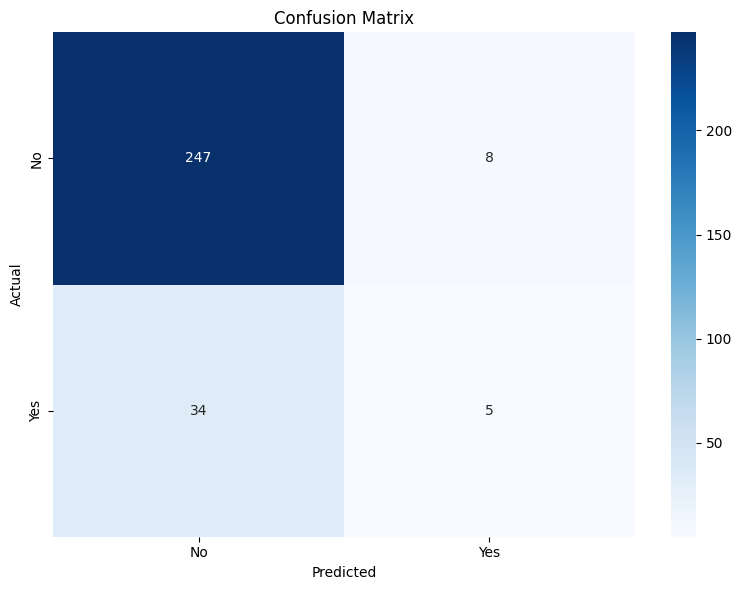


Predicted Attrition: No for given inputs!


In [6]:
#Working  on important features
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Step 2: Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(df['Attrition'])

# Step 3: Define features
features = ['MonthlyIncome', 'OverTime', 'Age', 'DailyRate', 'TotalWorkingYears',
            'MonthlyRate', 'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
            'YearsAtCompany', 'NumCompaniesWorked', 'JobRole', 'PercentSalaryHike',
            'StockOptionLevel', 'YearsWithCurrManager']


categorical_cols = ['OverTime','JobRole']

# Step 4: Encode categorical columns (once)
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

X = df[features]

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Evaluate
y_pred = model.predict(X_test)
print("Classification Report")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Step 9: User input
user_input = {}
for feature in features:
    if feature in categorical_cols:
        categories = list(le_dict[feature].classes_)
        val = input(f"Enter {feature} from {categories}: ")
        val = le_dict[feature].transform([val])[0]
    else:
        val = float(input(f"Enter {feature}: "))
    user_input[feature] = val

# Step 10: Predict
user_df = pd.DataFrame([user_input])
user_scaled = pd.DataFrame(scaler.transform(user_df), columns=user_df.columns)
prediction = model.predict(user_scaled)[0]
pred_label = le_target.inverse_transform([prediction])[0]

print(f"\nPredicted Attrition: {pred_label} for given inputs!")
